# How to use Shap with vizualizations

## Installments

In [1]:
!pip install Shap
!pip install transformers
!pip install datasets

## Linear Regression

### Imports

In [2]:
import shap
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_breast_cancer
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np

### Load data

In [3]:
# Read the DataFrame, first using the feature data
data = load_breast_cancer() 
df = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
# Add a target column, and fill it with the target data
df['target'] = data.target

In [5]:
# Set up the data for modelling 
y=df['target'].to_frame() # define Y
X=df[df.columns.difference(['target'])] # define X
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # create train and test

### Data understanding

In [6]:
df.describe()
pd.set_option("max_rows", None)

In [7]:
benign = df[df['target'] == 1] # benign
malign = df[df['target'] == 0] # malign

In [8]:
benign.head()

mean radius  mean texture  ...  worst fractal dimension  target
19       13.540         14.36  ...                  0.07259       1
20       13.080         15.71  ...                  0.08183       1
21        9.504         12.44  ...                  0.07773       1
37       13.030         18.42  ...                  0.06169       1
46        8.196         16.84  ...                  0.07409       1

[5 rows x 31 columns]

In [9]:
malign.head()

mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]

In [10]:
df

mean radius  mean texture  ...  worst fractal dimension  target
0         17.990         10.38  ...                  0.11890       0
1         20.570         17.77  ...                  0.08902       0
2         19.690         21.25  ...                  0.08758       0
3         11.420         20.38  ...                  0.17300       0
4         20.290         14.34  ...                  0.07678       0
5         12.450         15.70  ...                  0.12440       0
6         18.250         19.98  ...                  0.08368       0
7         13.710         20.83  ...                  0.11510       0
8         13.000         21.82  ...                  0.10720       0
9         12.460         24.04  ...                  0.20750       0
10        16.020         23.24  ...                  0.08452       0
11        15.780         17.89  ...                  0.10480       0
12        19.170         24.80  ...                  0.10230       0
13        15.850         23.95  ...                  0.06287       0
14        13.730         22.61  ...                  0.14310       0
15        14.540         27.54  ...                  0.13410       0
16        14.680         20.13  ...                  0.08216       0
17        16.130         20.68  ...                  0.11420       0
18        19.810         22.15  ...                  0.07615       0
19        13.540         14.36  ...                  0.07259       1
20        13.080         15.71  ...                  0.08183       1
21         9.504         12.44  ...                  0.07773       1
22        15.340         14.26  ...                  0.09946       0
23        21.160         23.04  ...                  0.07526       0
24        16.650         21.38  ...                  0.09564       0
25        17.140         16.40  ...                  0.10590       0
26        14.580         21.53  ...                  0.12750       0
27        18.610         20.25  ...                  0.07421       0
28        15.300         25.27  ...                  0.09876       0
29        17.570         15.05  ...                  0.07919       0
30        18.630         25.11  ...                  0.09782       0
31        11.840         18.70  ...                  0.14020       0
32        17.020         23.98  ...                  0.08482       0
33        19.270         26.47  ...                  0.11230       0
34        16.130         17.88  ...                  0.12330       0
35        16.740         21.59  ...                  0.08633       0
36        14.250         21.72  ...                  0.10140       0
37        13.030         18.42  ...                  0.06169       1
38        14.990         25.20  ...                  0.05504       0
39        13.480         20.82  ...                  0.10710       0
40        13.440         21.58  ...                  0.07146       0
41        10.950         21.35  ...                  0.09606       0
42        19.070         24.81  ...                  0.10380       0
43        13.280         20.28  ...                  0.10270       0
44        13.170         21.81  ...                  0.09618       0
45        18.650         17.60  ...                  0.09185       0
46         8.196         16.84  ...                  0.07409       1
47        13.170         18.66  ...                  0.11790       0
48        12.050         14.63  ...                  0.08301       1
49        13.490         22.30  ...                  0.06917       1
50        11.760         21.60  ...                  0.06563       1
51        13.640         16.34  ...                  0.08025       1
52        11.940         18.24  ...                  0.07408       1
53        18.220         18.70  ...                  0.07987       0
54        15.100         22.02  ...                  0.07873       0
55        11.520         18.75  ...                  0.07036       1
56        19.210         18.57  ...                  0.08294       0
57 

### Build model

In [11]:
lr = LinearRegression().fit(X_train, y_train)

In [12]:
# make prediction and check model accuracy 
lr_y_pred = lr.predict(X_test)

In [13]:
# Performance
print("rooted mean squared error:")
print(np.sqrt(mean_squared_error(y_test, lr_y_pred)))

rooted mean squared error:
0.25319727974507644


### Shap visualizations

In [14]:
# create the explainer with model and background dataset
lr_explainer = shap.LinearExplainer(lr, X_train)

In [15]:
# create shap values
lr_shap_values = lr_explainer.shap_values(X)

In [17]:
# create expected value
lr_exp_values = lr_explainer.expected_value

In [18]:
lr_sample_i = 181

In [19]:
# shap_values = explainer.shap_values(X_train.loc[sample_i])

In [20]:
lr_shap_values

array([[ 0.1389236 ,  0.04990743, -0.07484575, ..., -0.00440482,
        -0.17449112,  0.08104597],
       [ 0.04016422, -0.02949177, -0.02999314, ...,  0.00067876,
         0.0145205 ,  0.02257346],
       [ 0.06500348,  0.03007971, -0.16037442, ..., -0.00204837,
        -0.07360323,  0.00218503],
       ...,
       [ 0.00837745,  0.02400775, -0.06939807, ...,  0.00198938,
         0.06884475, -0.08042662],
       [ 0.05527944,  0.07759559, -0.08882815, ..., -0.0047755 ,
        -0.12200491, -0.13139772],
       [-0.02822776, -0.04808302,  0.21333682, ...,  0.00515867,
         0.0021648 , -0.04436217]])

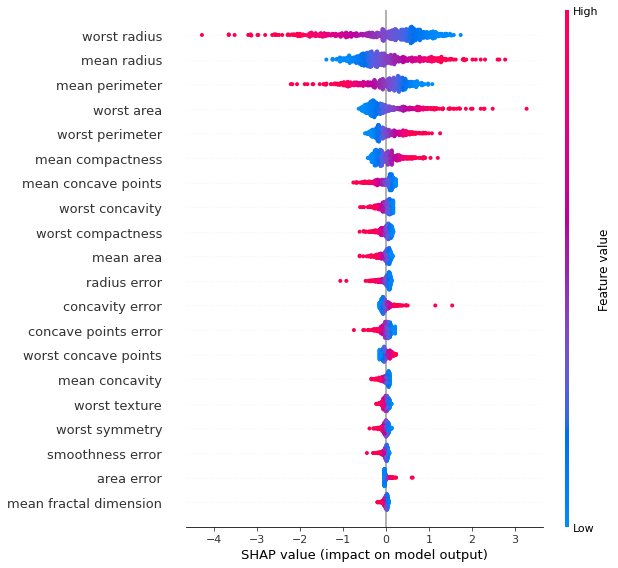

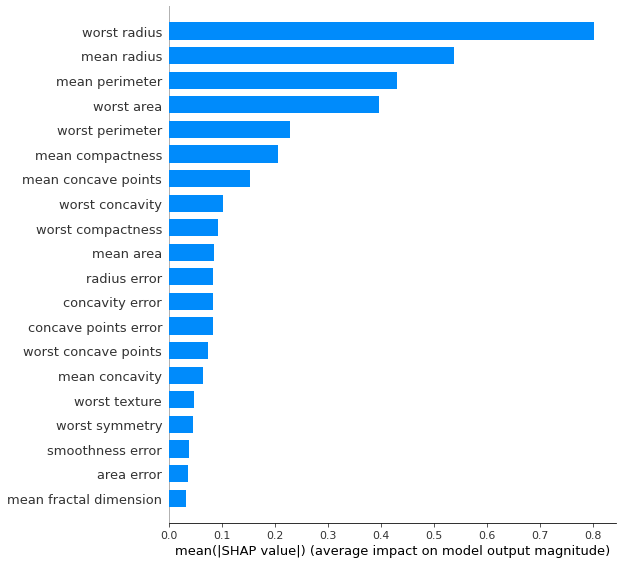

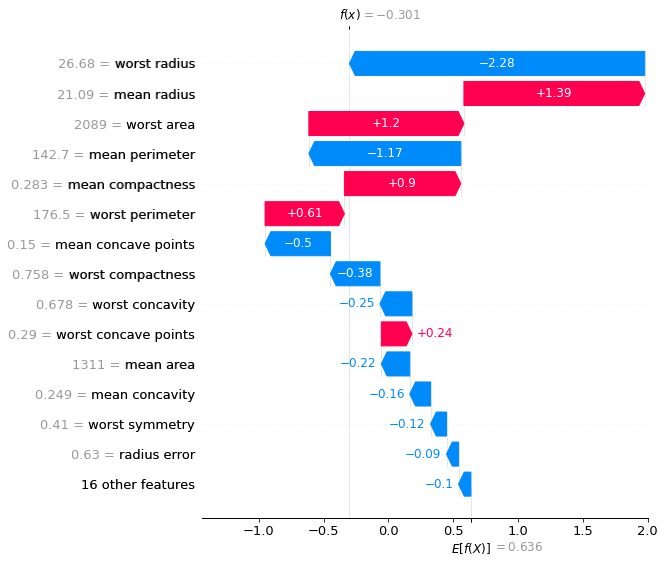

In [21]:
shap.initjs()

############## visualizations #############
# Generate summary dot plot
shap.summary_plot(lr_shap_values, X, title="SHAP summary plot") 

# Generate summary bar plot 
shap.summary_plot(lr_shap_values, X, plot_type="bar") 

# Generate waterfall plot
shap.plots._waterfall.waterfall_legacy(lr_explainer.expected_value, lr_explainer.shap_values(X_train.loc[lr_sample_i]), features=X_train.loc[lr_sample_i], feature_names=X.columns, max_display=15, show=True)

# # Generate dependence plot
# shap.dependence_plot("worst concave points", lr_shap_values, X, interaction_index="mean concave points")

# # Generate multiple dependence plots
# for name in X_train.columns:
#      shap.dependence_plot(name, lr_shap_values, X)
# shap.dependence_plot("worst concave points", lr_shap_values, X, interaction_index="mean concave points")

# # Generate force plot - Multiple rows 
shap.force_plot(lr_explainer.expected_value, lr_shap_values[:100,:], X.iloc[:100,:])

# # Generate force plot - Single
# shap.force_plot(lr_explainer.expected_value, lr_shap_values[0,:], X.iloc[0,:])

# # Generate Decision plot 
# shap.decision_plot(lr_explainer.expected_value, lr_shap_values[79],link='logit', features=X.loc[79,:], feature_names=(X.columns.tolist()),show=True,title="Decision Plot")



## XGB

### Imports

In [22]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

### Load data

This is already been done in Linear Regression

In [23]:
df

mean radius  mean texture  ...  worst fractal dimension  target
0         17.990         10.38  ...                  0.11890       0
1         20.570         17.77  ...                  0.08902       0
2         19.690         21.25  ...                  0.08758       0
3         11.420         20.38  ...                  0.17300       0
4         20.290         14.34  ...                  0.07678       0
5         12.450         15.70  ...                  0.12440       0
6         18.250         19.98  ...                  0.08368       0
7         13.710         20.83  ...                  0.11510       0
8         13.000         21.82  ...                  0.10720       0
9         12.460         24.04  ...                  0.20750       0
10        16.020         23.24  ...                  0.08452       0
11        15.780         17.89  ...                  0.10480       0
12        19.170         24.80  ...                  0.10230       0
13        15.850         23.95  ...                  0.06287       0
14        13.730         22.61  ...                  0.14310       0
15        14.540         27.54  ...                  0.13410       0
16        14.680         20.13  ...                  0.08216       0
17        16.130         20.68  ...                  0.11420       0
18        19.810         22.15  ...                  0.07615       0
19        13.540         14.36  ...                  0.07259       1
20        13.080         15.71  ...                  0.08183       1
21         9.504         12.44  ...                  0.07773       1
22        15.340         14.26  ...                  0.09946       0
23        21.160         23.04  ...                  0.07526       0
24        16.650         21.38  ...                  0.09564       0
25        17.140         16.40  ...                  0.10590       0
26        14.580         21.53  ...                  0.12750       0
27        18.610         20.25  ...                  0.07421       0
28        15.300         25.27  ...                  0.09876       0
29        17.570         15.05  ...                  0.07919       0
30        18.630         25.11  ...                  0.09782       0
31        11.840         18.70  ...                  0.14020       0
32        17.020         23.98  ...                  0.08482       0
33        19.270         26.47  ...                  0.11230       0
34        16.130         17.88  ...                  0.12330       0
35        16.740         21.59  ...                  0.08633       0
36        14.250         21.72  ...                  0.10140       0
37        13.030         18.42  ...                  0.06169       1
38        14.990         25.20  ...                  0.05504       0
39        13.480         20.82  ...                  0.10710       0
40        13.440         21.58  ...                  0.07146       0
41        10.950         21.35  ...                  0.09606       0
42        19.070         24.81  ...                  0.10380       0
43        13.280         20.28  ...                  0.10270       0
44        13.170         21.81  ...                  0.09618       0
45        18.650         17.60  ...                  0.09185       0
46         8.196         16.84  ...                  0.07409       1
47        13.170         18.66  ...                  0.11790       0
48        12.050         14.63  ...                  0.08301       1
49        13.490         22.30  ...                  0.06917       1
50        11.760         21.60  ...                  0.06563       1
51        13.640         16.34  ...                  0.08025       1
52        11.940         18.24  ...                  0.07408       1
53        18.220         18.70  ...                  0.07987       0
54        15.100         22.02  ...                  0.07873       0
55        11.520         18.75  ...                  0.07036       1
56        19.210         18.57  ...                  0.08294       0
57 

### Build model

In [24]:
# build model - Xgboost
xgb_mod=xgb.XGBClassifier(random_state=42,gpu_id=0) # build classifier
xgb_mod=xgb_mod.fit(X_train, y_train.values.ravel()) 

# make prediction and check model accuracy 
xgb_y_pred = xgb_mod.predict(X_test)

# Performance
accuracy = accuracy_score(y_test, xgb_y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.61%


### Shap visualizations

In [25]:
xgb_sample_i = 181

0.9907654


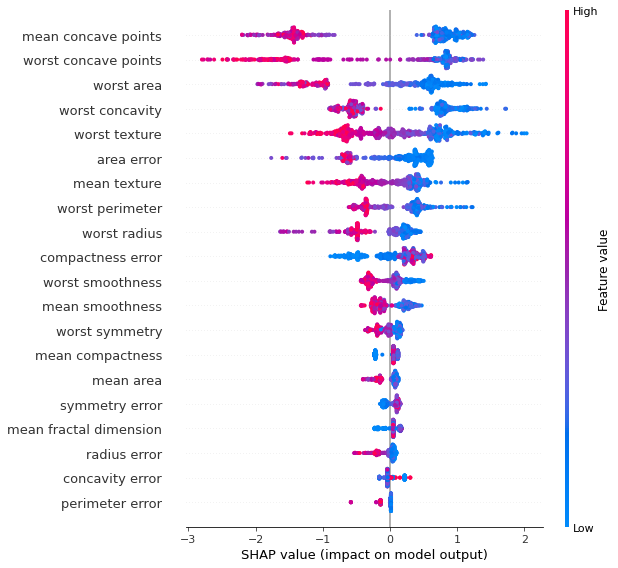

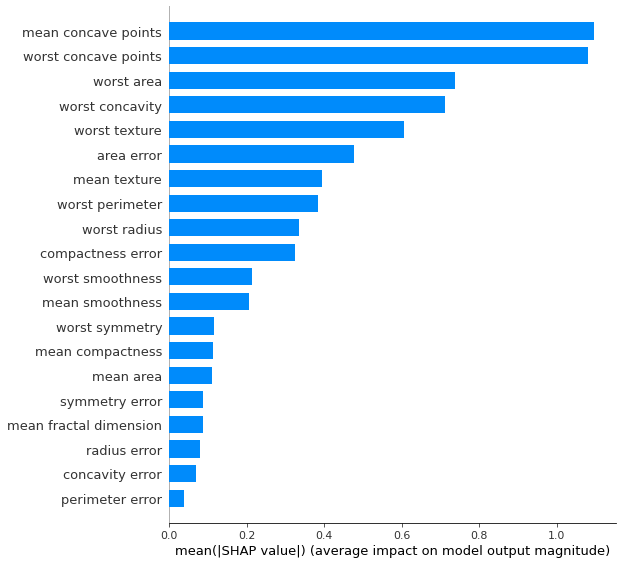

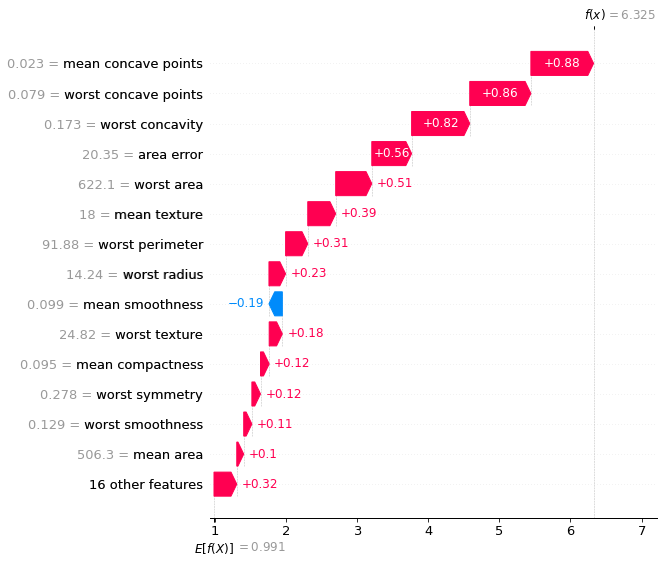

In [26]:
# Generate the Tree explainer and SHAP values
xgb_explainer = shap.TreeExplainer(xgb_mod)
xgb_values = xgb_explainer.shap_values(X)
xgb_expected_value = xgb_explainer.expected_value

print(xgb_expected_value)

############## visualizations ##############
# Generate summary dot plot
shap.summary_plot(xgb_values, X, title="SHAP summary plot") 

# Generate summary bar plot 
shap.summary_plot(xgb_values, X, plot_type="bar") 

# Generate waterfall plot
shap.plots._waterfall.waterfall_legacy(xgb_expected_value, xgb_values[79], features=X.loc[79,:], feature_names=X.columns, max_display=15, show=True)

# # Generate dependence plot
# shap.dependence_plot("worst concave points", xgb_values, X, interaction_index="mean concave points")

# # Generate multiple dependence plots
# for name in X_train.columns:
#      shap.dependence_plot(name, xgb_values, X)
# shap.dependence_plot("worst concave points", xgb_values, X, interaction_index="mean concave points")

# # Generate force plot - Multiple rows 
# shap.force_plot(xgb_explainer.expected_value, xgb_values[:100,:], X.iloc[:100,:])

# # Generate force plot - Single
# shap.force_plot(xgb_explainer.expected_value, xgb_values[0,:], X.iloc[0,:])

# # Generate Decision plot 
# shap.decision_plot(xgb_expected_value, xgb_values[79],link='logit', features=X.loc[79,:], feature_names=(X.columns.tolist()),show=True,title="Decision Plot")

## Image ResNet50

### Imports

In [27]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import shap

### Load data and model

In [28]:
# load pre-trained model and data
model = ResNet50(weights='imagenet')
X, y = shap.datasets.imagenet50()

In [29]:
# getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]
#print("Number of ImageNet classes:", len(class_names))
#print("Class names:", class_names)

In [30]:
# python function to get model output; replace this function with your own model function.
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# create an explainer with model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X[1:3], max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer: 3it [00:46, 23.03s/it]


### Shap visualizations

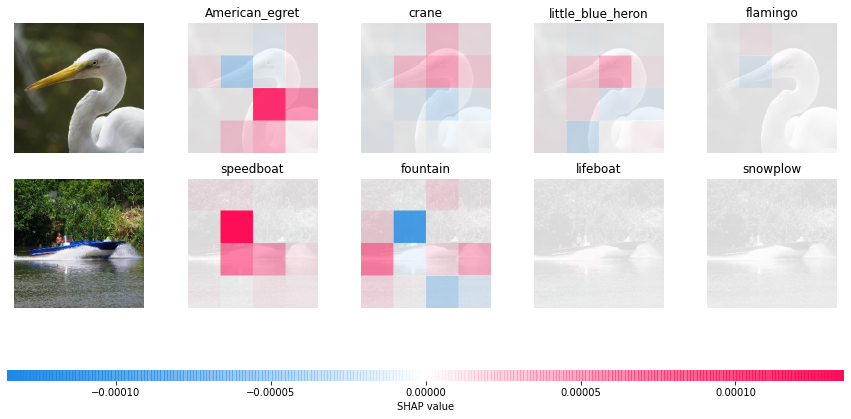

In [31]:
# output with shap values
shap.image_plot(shap_values)

In [32]:
# python function to get model output; replace this function with your own model function.
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", X[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(f, masker_blur, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(X[1:3], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  0%|          | 0/2498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/2498 [00:00<?, ?it/s]

Partition explainer: 3it [14:58, 449.28s/it]


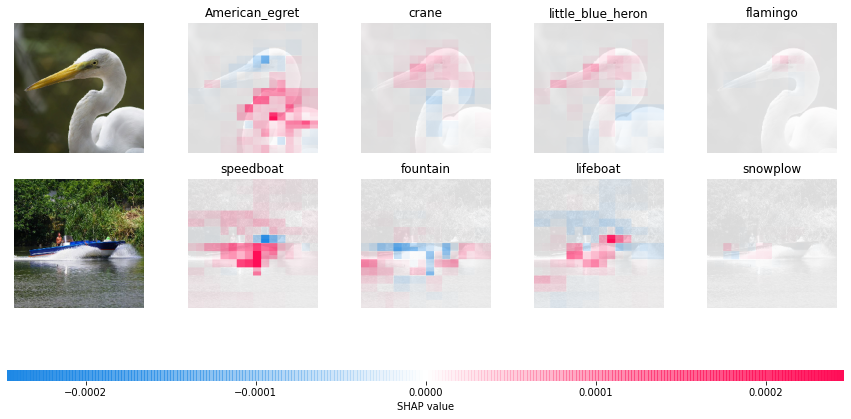

In [33]:
# output with shap values
shap.image_plot(shap_values_fine)

## pytorch MNIST

### Imports

In [34]:
import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F

import numpy as np
import shap

### Load and build model

In [35]:
batch_size = 128
num_epochs = 2
device = torch.device('cpu')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.ReLU(),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(50, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 320)
        x = self.fc_layers(x)
        return x

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output.log(), target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output.log(), target).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('mnist_data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('mnist_data', train=False, transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size, shuffle=True)

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

for epoch in range(1, num_epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.326794
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.100114
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.219773
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.955081
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.758869

Test set: Average loss: 0.0048, Accuracy: 8850/10000 (88%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.684492
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.856620
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.585443
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.487249
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.481854

Test set: Average loss: 0.0028, Accuracy: 9317/10000 (93%)



In [36]:
# since shuffle=True, this is a random sample of test data
batch = next(iter(test_loader))
images, _ = batch

background = images[:100]
test_images = images[100:103]

e = shap.DeepExplainer(model, background)
shap_values = e.shap_values(test_images)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [37]:
shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
test_numpy = np.swapaxes(np.swapaxes(test_images.numpy(), 1, -1), 1, 2)

### Shap visualizations

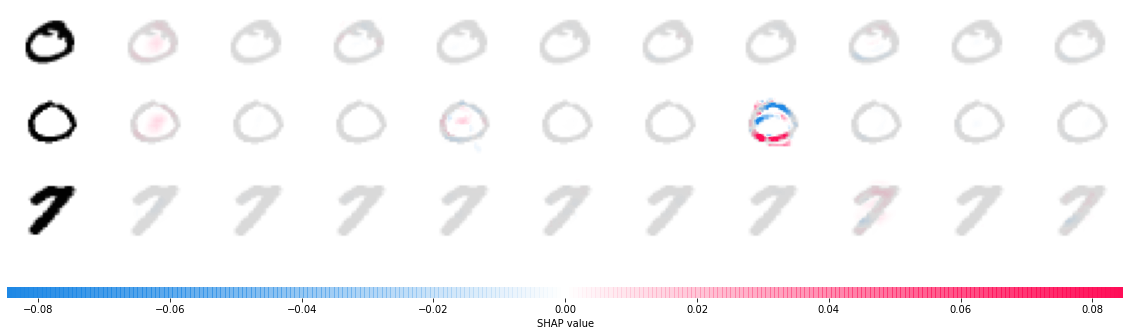

In [38]:
# plot the feature attributions
shap.image_plot(shap_numpy, -test_numpy)

The images after the first column are the images that show how much the corresponds with the numbers in order of 0 to 9 (left to right)

So on the places where the 2/3 are the most red thats the place that corresponds with the number 2 or 3.

## NLP

### Imports

In [39]:
import transformers
import datasets
import shap
import numpy as np

### Load data

In [40]:
dataset = datasets.load_dataset("imdb", split="test")

# shorten the strings to fit into the pipeline model
short_data = [v[:500] for v in dataset["text"][:20]]

Reusing dataset imdb (/root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


### Build model

In [41]:
classifier = transformers.pipeline('sentiment-analysis', return_all_scores=True)
classifier(short_data[:2])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


[[{'label': 'NEGATIVE', 'score': 0.07582021504640579},
  {'label': 'POSITIVE', 'score': 0.9241797924041748}],
 [{'label': 'NEGATIVE', 'score': 0.018342530354857445},
  {'label': 'POSITIVE', 'score': 0.9816575050354004}]]

### Shap visualizations

In [42]:
# define the explainer
explainer = shap.Explainer(classifier)

In [43]:
# explain the predictions of the pipeline on the first two samples
shap_values = explainer(short_data[:2])

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 3it [02:03, 61.55s/it]


In [44]:
shap.plots.text(shap_values[:,:,"POSITIVE"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [45]:
# explain the predictions of the pipeline on the first two samples
shap_values = explainer(short_data[:20])

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:   5%|▌         | 1/20 [00:00<?, ?it/s]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  15%|█▌        | 3/20 [02:01<07:54, 27.94s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  20%|██        | 4/20 [03:00<10:50, 40.68s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  25%|██▌       | 5/20 [04:01<12:08, 48.54s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  30%|███       | 6/20 [05:03<12:24, 53.21s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  35%|███▌      | 7/20 [06:02<11:54, 54.95s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  40%|████      | 8/20 [06:59<11:06, 55.53s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  45%|████▌     | 9/20 [08:00<10:30, 57.35s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 10/20 [09:11<10:17, 61.71s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  55%|█████▌    | 11/20 [10:15<09:22, 62.45s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  60%|██████    | 12/20 [11:18<08:18, 62.35s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  65%|██████▌   | 13/20 [12:21<07:18, 62.65s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  70%|███████   | 14/20 [13:35<06:36, 66.02s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  75%|███████▌  | 15/20 [14:42<05:31, 66.33s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  80%|████████  | 16/20 [15:44<04:20, 65.03s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  85%|████████▌ | 17/20 [16:43<03:10, 63.40s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  90%|█████████ | 18/20 [17:46<02:06, 63.05s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  95%|█████████▌| 19/20 [18:42<01:01, 61.16s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 20/20 [19:51<00:00, 63.32s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 21it [21:06, 63.31s/it]


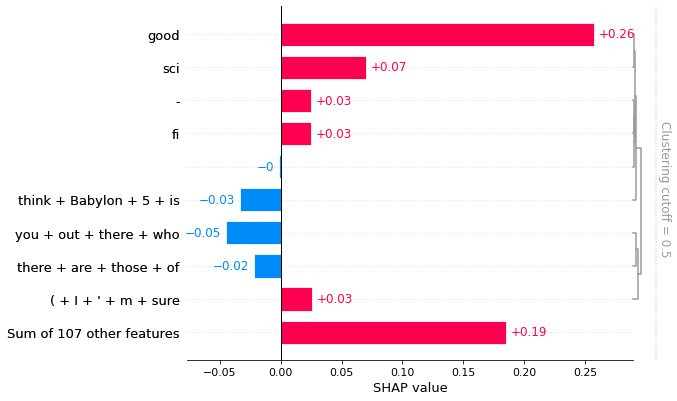

In [46]:
shap.plots.bar(shap_values[0,:,"POSITIVE"])